In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

## Load and Preprocessing Dataset

In [30]:
# Load Dataset
df = pd.read_csv('heart_cleveland_upload (dataset).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [31]:
# Dataset Description
print("Deskripsi Dataset :")
df.info()

Deskripsi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


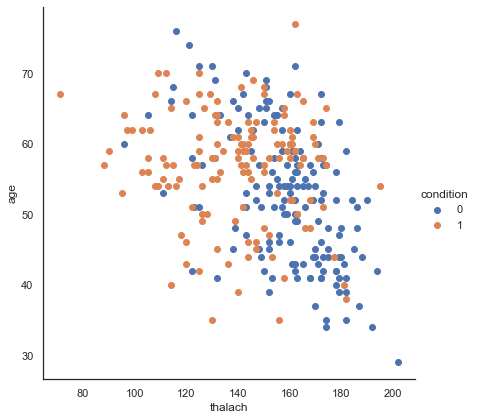

In [32]:
# Data Visualization
sns.set(style="white", color_codes=True)
sns.FacetGrid(df, hue="condition", size=6).map(plt.scatter, "thalach", "age").add_legend()

Total Condition 0 :  160 --> 53.87 %
Total Condition 1 :  137 --> 46.13 %


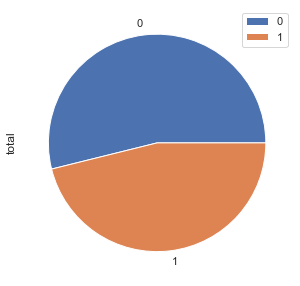

In [33]:
# Target Class Distribution
totalCon0 = df[df.condition == 0].count()
totalCon1 = df[df.condition == 1].count()
total = totalCon0['condition']+totalCon1['condition']
perCon0 = totalCon0['condition']/total*100
perCon1 = totalCon1['condition']/total*100
targetClass = pd.DataFrame({'total': [totalCon0['condition'], totalCon1['condition']]}, index=['0', '1'])
plot = targetClass.plot.pie(y="total", figsize=(5, 5))
print("Total Condition 0 : ", totalCon0['condition'], "-->", "%.2f" % perCon0, "%")
print("Total Condition 1 : ", totalCon1['condition'], "-->", "%.2f" % perCon1, "%")

Text(0.5, 1.0, 'Correlation Heatmap')

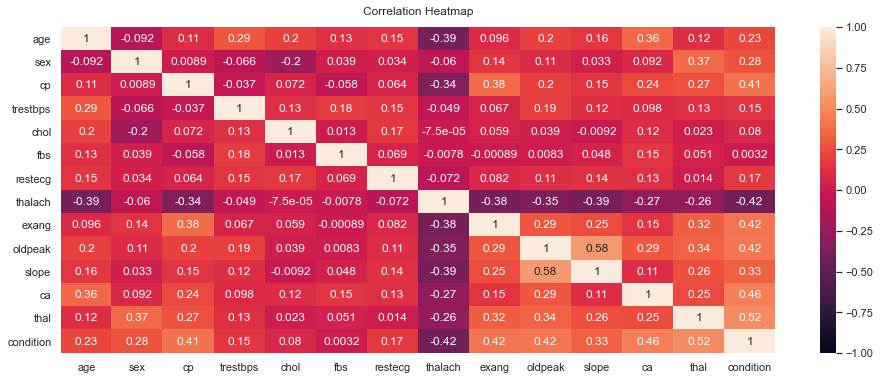

In [34]:
# Correlation Matrix
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

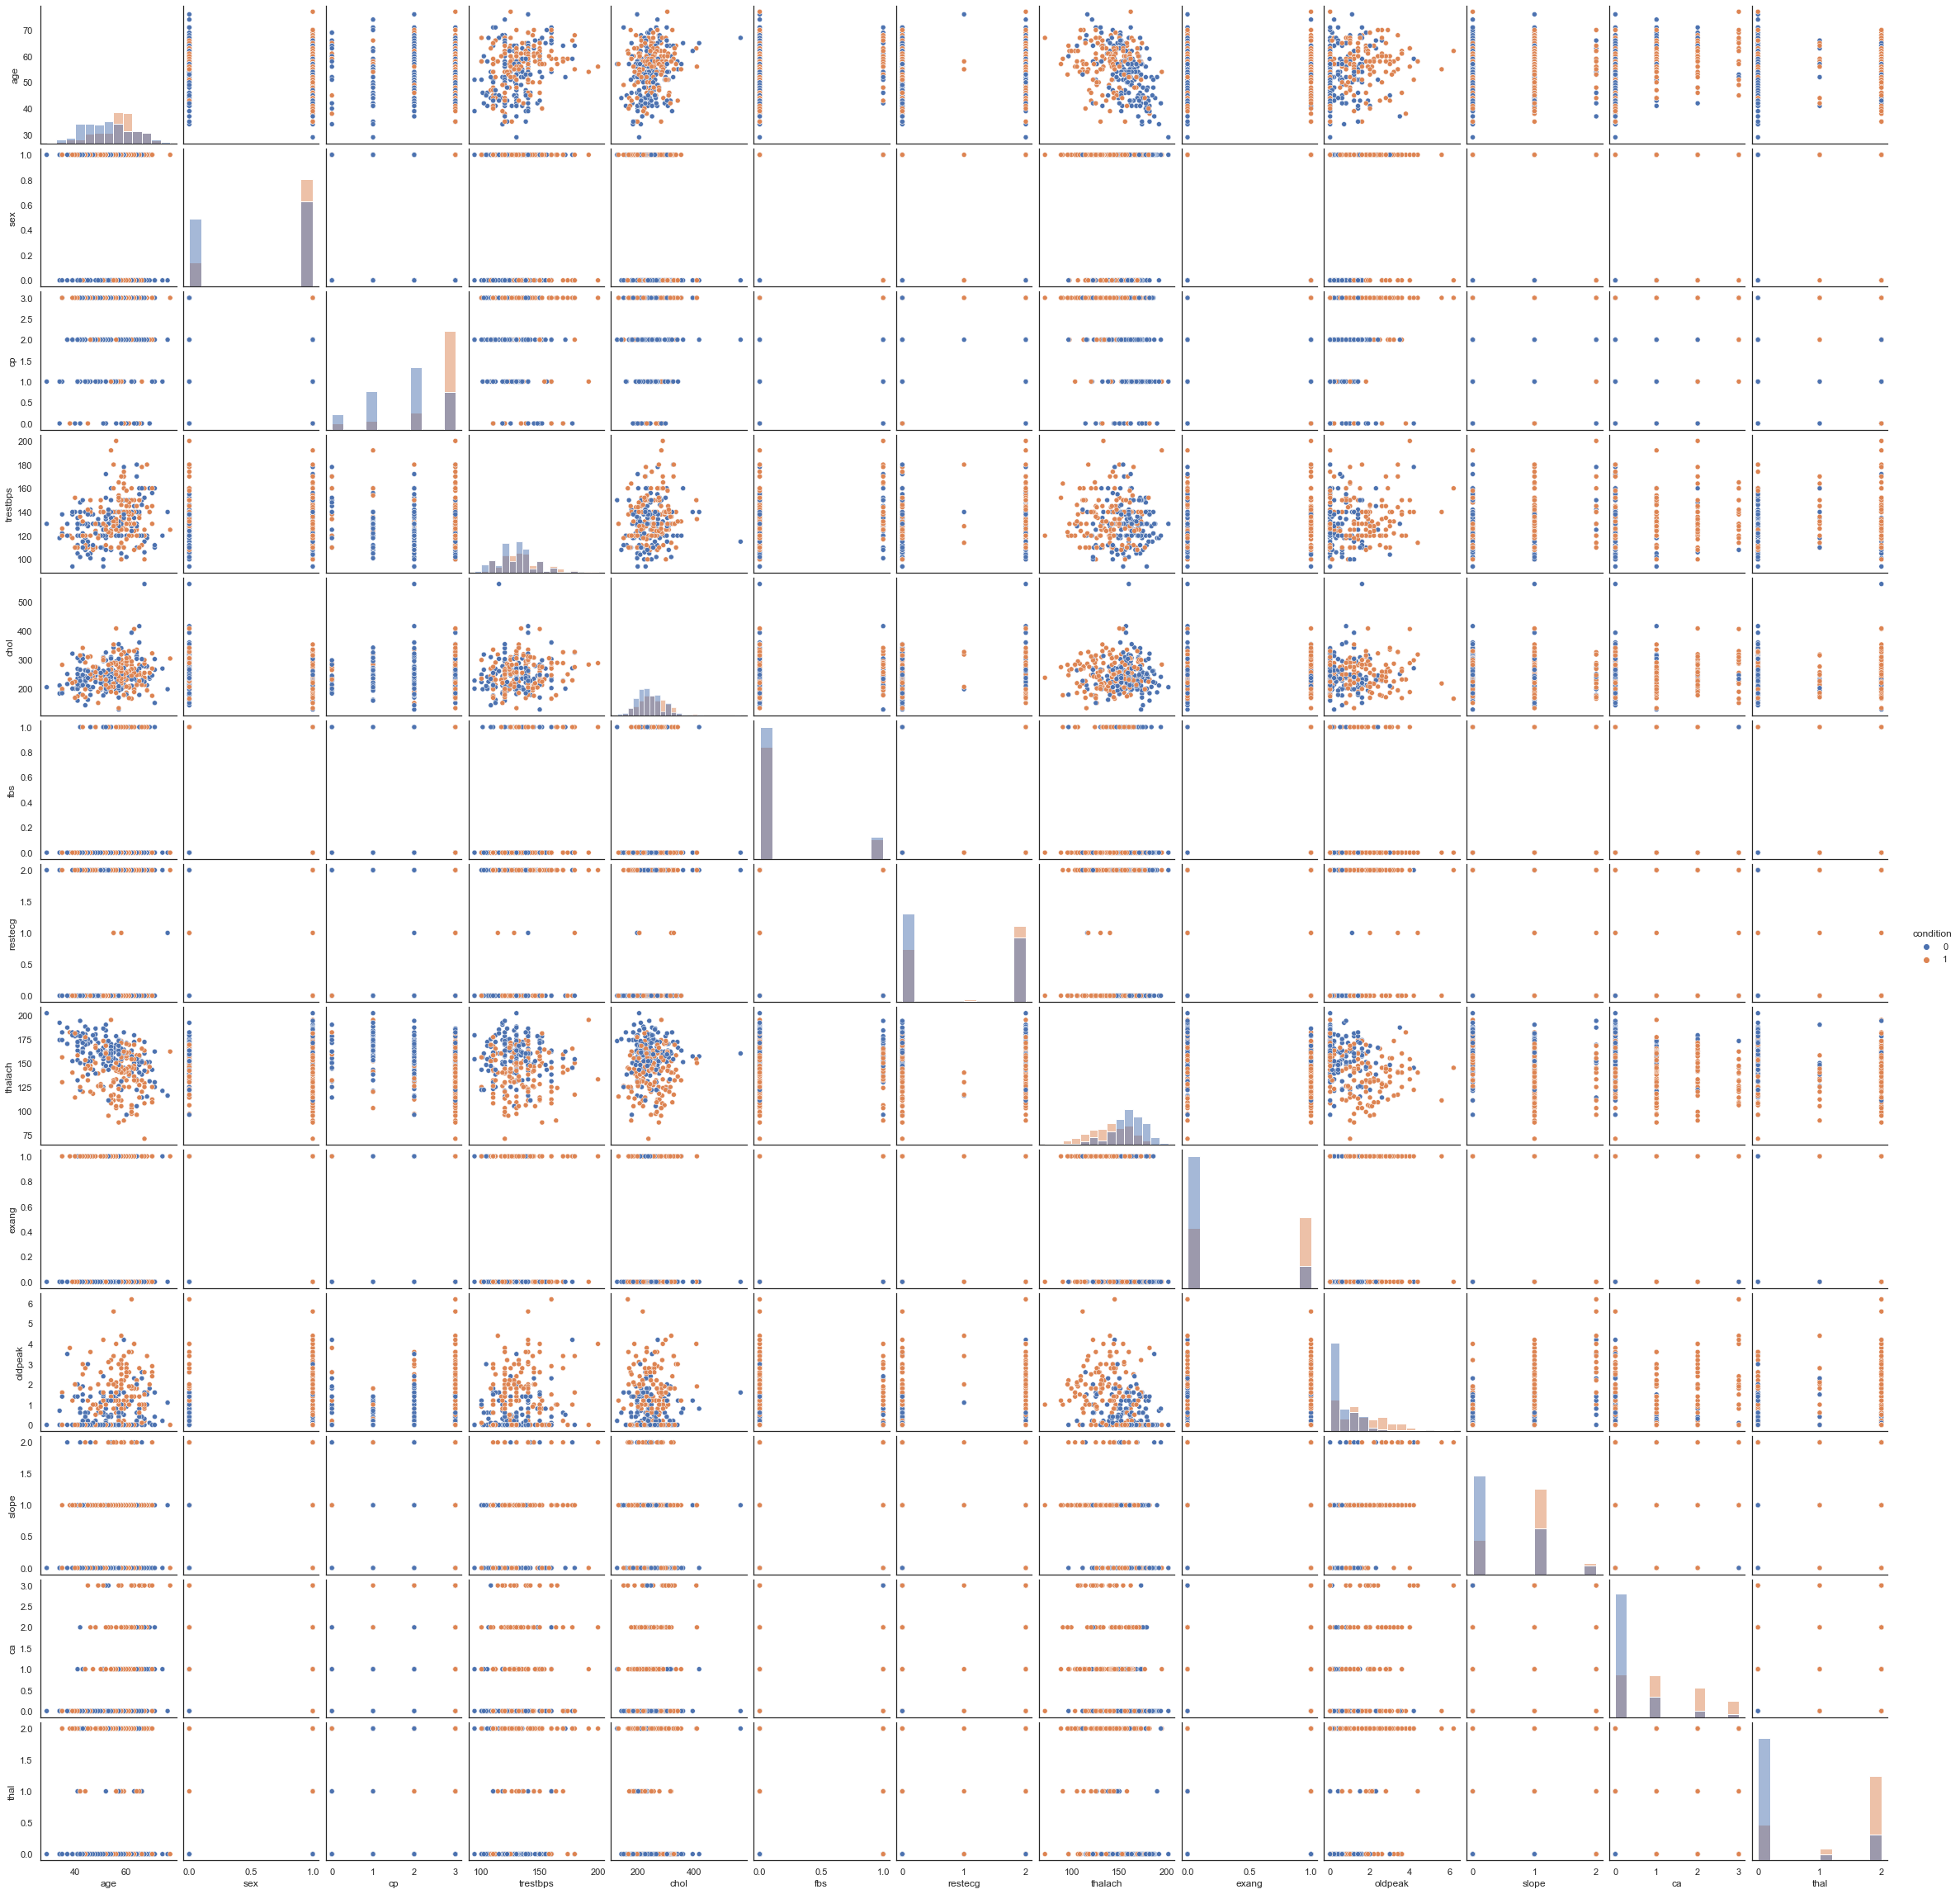

In [30]:
# Data Pairplot Visualization
sns.pairplot(df, hue="condition", diag_kind="hist")
# Saving the Seaborn Figure:
plt.savefig('PairplotResult.png')

In [35]:
# Convert Dataframe into Array
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values
print("Atribut Dataset :")
print(X,'\n', X.shape, '\n')
print("Class Target :")
print(y,'\n', y.shape,'\n')

Atribut Dataset :
[[69.  1.  0. ...  1.  1.  0.]
 [69.  0.  0. ...  0.  2.  0.]
 [66.  0.  0. ...  2.  0.  0.]
 ...
 [35.  1.  3. ...  1.  0.  2.]
 [35.  0.  3. ...  0.  0.  0.]
 [35.  1.  3. ...  0.  0.  2.]] 
 (297, 13) 

Class Target :
[0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0
 1] 
 (297,) 



In [36]:
# Data Normalization

#Mencari ukuran matrix
baris, kolom = X.shape
print("Jumlah Baris : ", baris)
print("Jumlah Kolom : ", kolom)

#Mencari nilai maksimum setiap kolom/kriteria
maksimum = np.amax(X, axis=0)
minimum = np.amin(X, axis=0)
print("\nNilai Maksimum Setiap Kolom : ", maksimum)
print("Ukuran Nilai Matrix Maksimum : ", maksimum.shape)
print("\nNilai Minimum Setiap Kolom : ", minimum)
print("Ukuran Nilai Matrix Minimum : ", minimum.shape)

#Tahapan Normalisasi
for a in range(kolom):
    for b in range(baris):
        if a == 0:
            X[b][a] = (X[b][a] - minimum[0])/(maksimum[0] - minimum[0])
        elif a == 1:
            X[b][a] = (X[b][a] - minimum[1])/(maksimum[1] - minimum[1])
        elif a == 2:
            X[b][a] = (X[b][a] - minimum[2])/(maksimum[2] - minimum[2])
        elif a == 3:
            X[b][a] = (X[b][a] - minimum[3])/(maksimum[3] - minimum[3])
        elif a == 4:
            X[b][a] = (X[b][a] - minimum[4])/(maksimum[4] - minimum[4])
        elif a == 5:
            X[b][a] = (X[b][a] - minimum[5])/(maksimum[5] - minimum[5])
        elif a == 6:
            X[b][a] = (X[b][a] - minimum[6])/(maksimum[6] - minimum[6])
        elif a == 7:
            X[b][a] = (X[b][a] - minimum[7])/(maksimum[7] - minimum[7])
        elif a == 8:
            X[b][a] = (X[b][a] - minimum[8])/(maksimum[8] - minimum[8])
        elif a == 9:
            X[b][a] = (X[b][a] - minimum[9])/(maksimum[9] - minimum[9])
        elif a == 10:
            X[b][a] = (X[b][a] - minimum[10])/(maksimum[10] - minimum[10])
        elif a == 11:
            X[b][a] = (X[b][a] - minimum[11])/(maksimum[11] - minimum[11])
        elif a == 12:
            X[b][a] = (X[b][a] - minimum[12])/(maksimum[12] - minimum[12])
        elif a == 13:
            X[b][a] = (X[b][a] - minimum[13])/(maksimum[13] - minimum[13])

#Hasil Normalisasi
print("\nData Hasil Normalisasi : ")
print(X)

Jumlah Baris :  297
Jumlah Kolom :  13

Nilai Maksimum Setiap Kolom :  [ 77.    1.    3.  200.  564.    1.    2.  202.    1.    6.2   2.    3.
   2. ]
Ukuran Nilai Matrix Maksimum :  (13,)

Nilai Minimum Setiap Kolom :  [ 29.   0.   0.  94. 126.   0.   0.  71.   0.   0.   0.   0.   0.]
Ukuran Nilai Matrix Minimum :  (13,)

Data Hasil Normalisasi : 
[[0.83333333 1.         0.         ... 0.5        0.33333333 0.        ]
 [0.83333333 0.         0.         ... 0.         0.66666667 0.        ]
 [0.77083333 0.         0.         ... 1.         0.         0.        ]
 ...
 [0.125      1.         1.         ... 0.5        0.         1.        ]
 [0.125      0.         1.         ... 0.         0.         0.        ]
 [0.125      1.         1.         ... 0.         0.         1.        ]]


In [37]:
# Spliting training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Training : ")
print(X_train)
print(len(X_train))
print("Label Data Training : ")
print(y_train)
print(len(y_train))
print("Data Testing : ")
print(X_test)
print(len(X_test))
print("Label Data Testing : ")
print(y_test)
print(len(y_test))

Data Training : 
[[0.35416667 1.         1.         ... 0.5        0.66666667 1.        ]
 [0.45833333 0.         1.         ... 0.5        0.         1.        ]
 [0.625      1.         0.33333333 ... 0.         0.         0.        ]
 ...
 [0.5625     1.         0.66666667 ... 0.5        0.33333333 0.5       ]
 [0.375      1.         1.         ... 0.5        0.33333333 0.        ]
 [0.60416667 1.         0.66666667 ... 0.         0.         0.        ]]
237
Label Data Training : 
[1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0]
237
Data Testing : 
[[0.770833

In [38]:
# Export to Excel
nama_kolom = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal']

df1 = pd.DataFrame(X, columns=nama_kolom)
df1['condition'] = y.tolist()

df2 = pd.DataFrame(X_train, columns=nama_kolom)
df2['condition'] = y_train.tolist()

df3 = pd.DataFrame(X_test, columns=nama_kolom)
df3['condition'] = y_test.tolist()

with pd.ExcelWriter('Dataset.xlsx') as writer:
    df1.to_excel(writer, sheet_name='NormalizationResult')
    df2.to_excel(writer, sheet_name='Data Training')
    df3.to_excel(writer, sheet_name='Data Testing')

print("Dataset has heen exported to Excel!")

Dataset has heen exported to Excel!


## Polynomial Kernel

Prediksi Benar :  47 data
Prediksi Salah :  13 data
Akurasi Model :  0.7833333333333333
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

Confusion Matrix


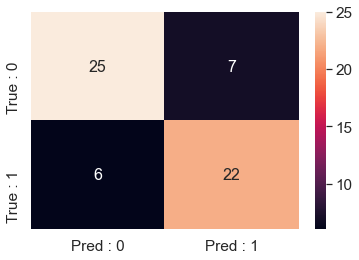

In [39]:
# Model Preparation
poly_svm = SVC(kernel='poly', C=1.0)

# Training Process
poly_svm.fit(X_train,y_train)

# Testing Model
y_pred = poly_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred == y_test).sum()
prediksiSalah = (y_pred != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  44 data
Prediksi Salah :  16 data
Akurasi Model :  0.7333333333333333
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60

Confusion Matrix


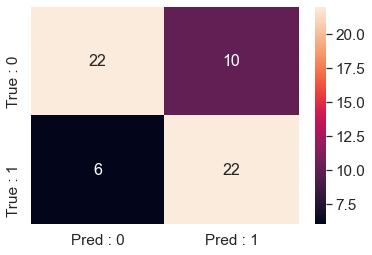

In [40]:
# Model Preparation
poly_svm = SVC(kernel='poly', C=10.0)

# Training Process
poly_svm.fit(X_train,y_train)

# Testing Model
y_pred1 = poly_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred1 == y_test).sum()
prediksiSalah = (y_pred1 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred1))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred1),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  44 data
Prediksi Salah :  16 data
Akurasi Model :  0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Confusion Matrix


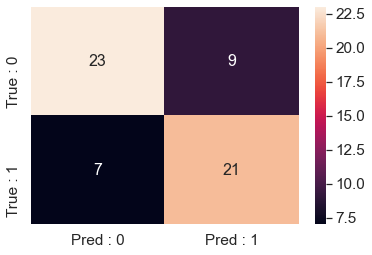

In [41]:
# Model Preparation
poly_svm = SVC(kernel='poly', C=100.0)

# Training Process
poly_svm.fit(X_train,y_train)

# Testing Model
y_pred2 = poly_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred2 == y_test).sum()
prediksiSalah = (y_pred2 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred2))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred2),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  43 data
Prediksi Salah :  17 data
Akurasi Model :  0.7166666666666667
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.66      0.82      0.73        28

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60

Confusion Matrix


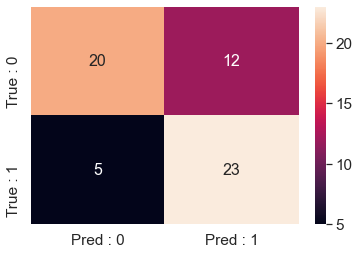

In [42]:
# Model Preparation
poly_svm = SVC(kernel='poly', C=1000.0)

# Training Process
poly_svm.fit(X_train,y_train)

# Testing Model
y_pred3 = poly_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred3 == y_test).sum()
prediksiSalah = (y_pred3 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred3))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred3),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## RBF Kernel

Prediksi Benar :  44 data
Prediksi Salah :  16 data
Akurasi Model :  0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Confusion Matrix


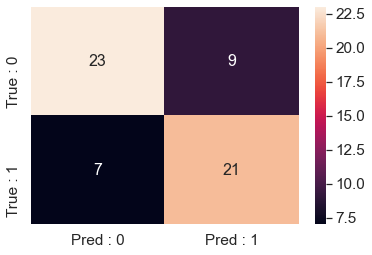

In [43]:
# Model Preparation
rbf_svm = SVC(kernel='rbf', C=1.0)

# Training Process
rbf_svm.fit(X_train,y_train)

# Testing Model
y_pred = rbf_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred == y_test).sum()
prediksiSalah = (y_pred != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  45 data
Prediksi Salah :  15 data
Akurasi Model :  0.75
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

Confusion Matrix


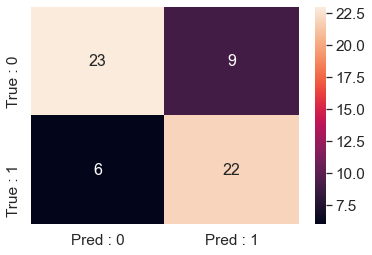

In [44]:
# Model Preparation
rbf_svm = SVC(kernel='rbf', C=10.0)

# Training Process
rbf_svm.fit(X_train,y_train)

# Testing Model
y_pred1 = rbf_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred1 == y_test).sum()
prediksiSalah = (y_pred1 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred1))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred1),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  44 data
Prediksi Salah :  16 data
Akurasi Model :  0.7333333333333333
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60

Confusion Matrix


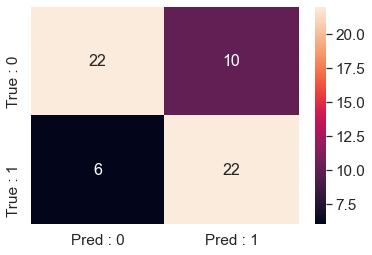

In [45]:
# Model Preparation
rbf_svm = SVC(kernel='rbf', C=100.0)

# Training Process
rbf_svm.fit(X_train,y_train)

# Testing Model
y_pred2 = rbf_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred2 == y_test).sum()
prediksiSalah = (y_pred2 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred2))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred2),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  43 data
Prediksi Salah :  17 data
Akurasi Model :  0.7166666666666667
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.68      0.75      0.71        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60

Confusion Matrix


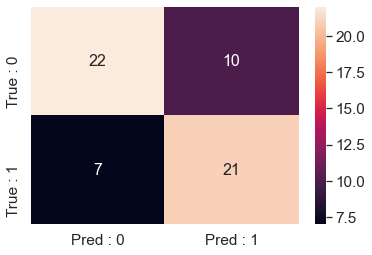

In [46]:
# Model Preparation
rbf_svm = SVC(kernel='rbf', C=1000.0)

# Training Process
rbf_svm.fit(X_train,y_train)

# Testing Model
y_pred3 = rbf_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred3 == y_test).sum()
prediksiSalah = (y_pred3 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred3))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred3),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Sigmoid Kernel

Prediksi Benar :  31 data
Prediksi Salah :  29 data
Akurasi Model :  0.5166666666666667
              precision    recall  f1-score   support

           0       0.54      0.59      0.57        32
           1       0.48      0.43      0.45        28

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.51      0.52      0.51        60

Confusion Matrix


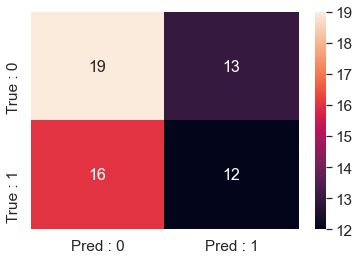

In [47]:
# Model Preparation
sigmoid_svm = SVC(kernel='sigmoid', C=1.0)

# Training Process
sigmoid_svm.fit(X_train,y_train)

# Testing Model
y_pred = sigmoid_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred == y_test).sum()
prediksiSalah = (y_pred != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  30 data
Prediksi Salah :  30 data
Akurasi Model :  0.5
              precision    recall  f1-score   support

           0       0.53      0.56      0.55        32
           1       0.46      0.43      0.44        28

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.49        60
weighted avg       0.50      0.50      0.50        60

Confusion Matrix


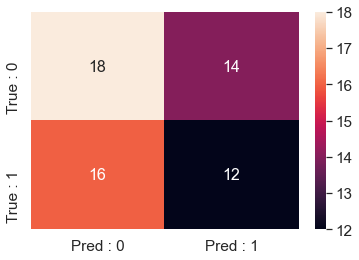

In [48]:
# Model Preparation
sigmoid_svm = SVC(kernel='sigmoid', C=10.0)

# Training Process
sigmoid_svm.fit(X_train,y_train)

# Testing Model
y_pred1 = sigmoid_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred1 == y_test).sum()
prediksiSalah = (y_pred1 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred1))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred1),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  31 data
Prediksi Salah :  29 data
Akurasi Model :  0.5166666666666667
              precision    recall  f1-score   support

           0       0.55      0.56      0.55        32
           1       0.48      0.46      0.47        28

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.52      0.52      0.52        60

Confusion Matrix


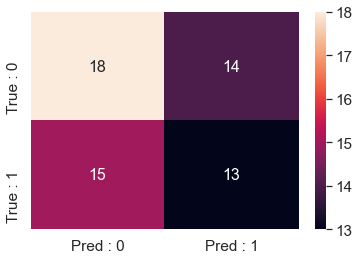

In [49]:
# Model Preparation
sigmoid_svm = SVC(kernel='sigmoid', C=100.0)

# Training Process
sigmoid_svm.fit(X_train,y_train)

# Testing Model
y_pred2 = sigmoid_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred2 == y_test).sum()
prediksiSalah = (y_pred2 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred2))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred2),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Prediksi Benar :  31 data
Prediksi Salah :  29 data
Akurasi Model :  0.5166666666666667
              precision    recall  f1-score   support

           0       0.55      0.56      0.55        32
           1       0.48      0.46      0.47        28

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.52      0.52      0.52        60

Confusion Matrix


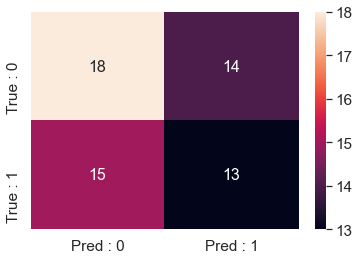

In [50]:
# Model Preparation
sigmoid_svm = SVC(kernel='sigmoid', C=1000.0)

# Training Process
sigmoid_svm.fit(X_train,y_train)

# Testing Model
y_pred3 = sigmoid_svm.predict(X_test)

# Accuracy
prediksiBenar = (y_pred3 == y_test).sum()
prediksiSalah = (y_pred3 != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

# Classification Report
print(classification_report(y_test, y_pred3))

# Confussion Matrix
print("Confusion Matrix")
df_cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred3),
    index=['True : 0', 'True : 1'],
    columns=['Pred : 0', 'Pred : 1'],
)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()